In [49]:
# What are the relationships between the variables? 

In [50]:
## Import the required packages, data, and clean the data

In [51]:
exec(open("../../Scripts/Packages.py").read())
Capstone = pd.read_csv("../../Data/Capstone.csv")
%matplotlib inline
Capstone.head(10)

,playerID,salary,G_all,birthCountry,NumPos,yearsPlayed,age,height,weight,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh
0,barkele01,0.870000,20.0,USA,1,9,30.0,77.0,225.0,1,0,0,0,0,0,0,0,0,0
1,bedrost01,0.550000,37.0,USA,1,4,28.0,75.0,200.0,1,0,0,0,0,0,0,0,0,0
2,benedbr01,0.545000,70.0,USA,1,7,30.0,73.0,175.0,0,1,0,0,0,0,0,0,0,0
3,campri01,0.633333,66.0,USA,1,9,32.0,73.0,195.0,1,0,0,0,0,0,0,0,0,0
4,ceronri01,0.625000,96.0,USA,1,10,31.0,71.0,192.0,0,1,0,0,0,0,0,0,0,0
5,chambch01,0.800000,101.0,USA,1,14,37.0,73.0,195.0,0,0,1,0,0,0,0,0,0,0
6,dedmoje01,0.150000,60.0,USA,1,2,25.0,74.0,200.0,1,0,0,0,0,0,0,0,0,0
7,forstte01,0.483333,46.0,USA,1,14,33.0,75.0,200.0,1,0,0,0,0,0,0,0,0,0
8,garbege01,0.772000,59.0,USA,1,16,38.0,70.0,175.0,1,0,0,0,0,0,0,0,0,0
9,harpete01,0.250000,138.0,USA,2,5,30.0,76.0,195.0,0,0,0,0,0,0,1,0,1,0


## Dummy the applicable variables

In [52]:
Dummy = Capstone.loc[:, list(Capstone.select_dtypes(include=['O']).columns)[1:]]
Dummy = pd.get_dummies(Dummy, prefix=None, prefix_sep=' - ')

## Scale the applicable variables

In [53]:
Scale = Capstone.loc[:, list(Capstone.select_dtypes(include=['float', 'int']).columns)[1:]]
Imputer = Imputer().fit_transform(Scale)
Scale = pd.DataFrame(Imputer, columns = Scale.columns)

In [54]:
Analysis = Capstone.loc[:, ['salary']]
Analysis = pd.concat([Analysis, Dummy, Scale], axis=1, join='inner')

Analysis.describe()

,salary,birthCountry - Afghanistan,birthCountry - Aruba,birthCountry - Australia,birthCountry - Belgium,birthCountry - Belize,birthCountry - Brazil,birthCountry - CAN,birthCountry - Colombia,birthCountry - Cuba,...,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh
count,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,...,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000,25575.000000
mean,2.008563,0.000117,0.000743,0.002815,0.000156,0.000078,0.000078,0.011613,0.001955,0.009306,...,0.488055,0.122893,0.185376,0.153236,0.168133,0.138925,0.211339,0.158710,0.198944,0.251417
std,3.315706,0.010830,0.027247,0.052985,0.012505,0.008843,0.008843,0.107138,0.044173,0.096019,...,0.499867,0.328321,0.388610,0.360221,0.373992,0.345875,0.408266,0.365412,0.399214,0.433836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.275000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
rho, pval = stats.spearmanr(Capstone)

/Users/Margaret/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


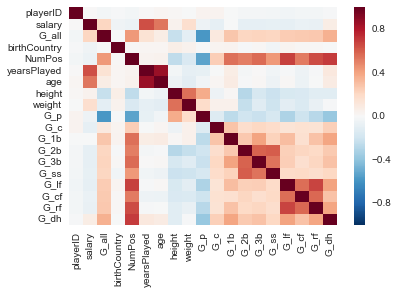

In [56]:
sns.heatmap(pd.DataFrame(rho), xticklabels=list(Capstone), yticklabels=list(Capstone))

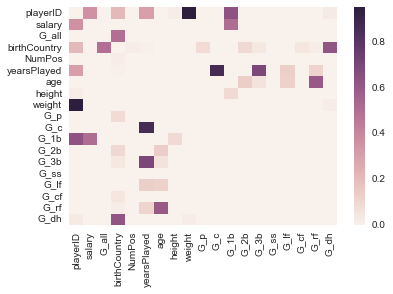

In [57]:
sns.heatmap(pd.DataFrame(pval), xticklabels=list(Capstone), yticklabels=list(Capstone))

In [62]:
Rho, Pval = stats.spearmanr(Analysis)
Rho = pd.DataFrame(Rho, index=list(Analysis), columns=list(Analysis))
PVal = pd.DataFrame(Pval, index=list(Analysis), columns=list(Analysis))

Salary_Target = pd.concat([Rho.loc[:,'salary'], PVal.loc[:,'salary']], axis=1,  join='inner')
Salary_Target.columns = ["Rho", "PValue"]

alpha = .01

Salary_Target = Salary_Target.loc[lambda Salary_Target: Salary_Target.PValue < alpha, :].sort_values(by='Rho', ascending=0)
print(Salary_Target)
regvar = Salary_Target.index.values.tolist()

                               Rho         PValue
salary                    1.000000   0.000000e+00
yearsPlayed               0.644989   0.000000e+00
age                       0.537899   0.000000e+00
G_all                     0.227484  1.861795e-297
weight                    0.170110  2.536380e-165
G_dh                      0.077949   9.106781e-36
birthCountry - Japan      0.073633   4.342490e-32
height                    0.044883   6.915792e-13
birthCountry - Cuba       0.044858   7.121310e-13
birthCountry - D.R.       0.022434   3.332887e-04
birthCountry - Venezuela  0.022373   3.459144e-04
birthCountry - Colombia   0.017777   4.468549e-03
birthCountry - Jamaica    0.017477   5.188250e-03
birthCountry - Honduras  -0.017211   5.915334e-03
birthCountry - France    -0.018513   3.068887e-03
birthCountry - V.I.      -0.021833   4.797957e-04
G_p                      -0.047257   3.991528e-14
birthCountry - USA       -0.059985   7.904362e-22
NumPos                   -0.062120   2.691186e-23


In [70]:
Analysis.fillna(0)
Xvar = Analysis.loc[:, regvar[1:]]
Yvar = Analysis.loc[:, regvar[:1]]

Xvar.to_csv("../../Data/Xvar.csv", index = False)
Yvar.to_csv("../../Data/Yvar.csv", index = False)